In [1]:
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import pandas as pd

In [2]:
# data
confirmed_cases = np.loadtxt('../data/confirmed_cases.dat')
recovered_cases = np.loadtxt('../data/recovered_cases.dat')
death_cases = np.loadtxt('../data/death_cases.dat')

epidemics_start_date = dt.datetime(2020, 2, 26)
date_list = [epidemics_start_date + dt.timedelta(days=i) for i in range(confirmed_cases.size)]

# dataframe
df = pd.DataFrame({
    'date': date_list,
    'confirmed_cases': confirmed_cases,
    'recovered_cases': recovered_cases,
    'death_cases': death_cases,
})
print(df)

          date  confirmed_cases  recovered_cases  death_cases
0   2020-02-26              1.0              0.0          0.0
1   2020-02-27              3.0              0.0          0.0
2   2020-02-28              3.0              0.0          0.0
3   2020-02-29              5.0              0.0          0.0
4   2020-03-01              6.0              0.0          0.0
..         ...              ...              ...          ...
177 2020-08-21           7329.0           5472.0        168.0
178 2020-08-22           7594.0           5584.0        169.0
179 2020-08-23           7900.0           5678.0        170.0
180 2020-08-24           8175.0           5801.0        171.0
181 2020-08-25           8311.0           5926.0        173.0

[182 rows x 4 columns]


In [3]:
def ordinary_least_squares(x, y):
    """Return the intercept and the bias of the linear regression line for (x, y) data.
    Implementation details: https://en.wikipedia.org/wiki/Ordinary_least_squares 
    
    Parameters
    ----------
    x : numpy.ndarray
        1-D array of x values.
    y : numpy.ndarray
        1-D array of y values.
    
    Returns
    -------
    tuple
        (intercept, bias)
    """
    assert x.ndim == 1, 'x must be array_like with ndim = 1.'
    assert y.ndim == 1, 'y must be array_like with ndim = 1.'
    x_col = x.reshape(-1, 1)
    x_col_bias = np.c_[x_col, np.ones(x_col.shape)]
    y_col = y.reshape(-1, 1)
    sol = np.linalg.pinv(x_col_bias.T @ x_col_bias) @ x_col_bias.T @ y_col 
    return (sol[0, 0], sol[1, 0])

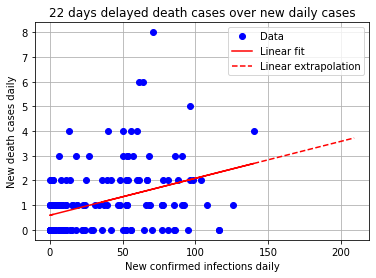

In [4]:
death_offset = 22
extrapolation_addon_confirmed_cases = 70
x = np.diff(df.confirmed_cases)[:-death_offset]
y = np.diff(df.death_cases)[death_offset:]

k, l = ordinary_least_squares(x, y)

plt.plot(x, y, 'bo', label='Data')
plt.plot(x, k*x + l, 'r-', label='Linear fit')
plt.plot(
    np.arange(np.max(x), np.max(x) + extrapolation_addon_confirmed_cases), 
    k*np.arange(np.max(x), np.max(x) + extrapolation_addon_confirmed_cases) + l, 
    'r--', label='Linear extrapolation',
)
plt.xlabel('New confirmed infections daily')
plt.ylabel('New death cases daily')
plt.title(f'{death_offset} days delayed death cases over new daily cases')
plt.legend()
plt.grid()
plt.show()